<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string

import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
my_path="/content/drive/MyDrive/CS491/Data/US_Inaugural_Addresses"

In [4]:
# Assuming all your text files are in the 'inauguration_speeches' directory
directory = my_path
all_files = os.listdir(directory)


In [5]:
combined_text = "" # This will store all text combined from all files

for filename in all_files:
    filepath = os.path.join(directory, filename)
    with open(filepath, 'r', encoding='utf-8') as file:
        text = file.read()
        combined_text += text + " " # Ensure there's space between texts

# Use NLTK's sent_tokenize to split the combined text into sentences

In [7]:
sentences = sent_tokenize(combined_text)


In [8]:
tokenized_sentences = []
for sentence in sentences:
    # Tokenize each sentence into words and apply lowercasing
    words = word_tokenize(sentence.lower())
    # Remove stopwords
    words_filtered = [word for word in words if word not in stop_words and word.isalpha()]  # isalpha() helps remove punctuation
    tokenized_sentences.append(words_filtered)


In [ ]:
tokenized_sentences[0:3]

In [14]:
##How many CPU cores are availabe in Colab?
!cat /proc/cpuinfo | grep processor | wc -l

2


In [34]:
model = Word2Vec(tokenized_sentences, vector_size=200, window=5, min_count=5, workers=4, epochs=200)
#Set min count up to about 10 to reduce number of words, which makes plotting work.

In [35]:
len(model.wv.index_to_key)

2614

In [36]:
# After training, you can use the model to find similar words, etc.
model.wv.most_similar('women',topn=10)

[('abilities', 0.39805513620376587),
 ('joined', 0.38109493255615234),
 ('mothers', 0.37600943446159363),
 ('children', 0.36433979868888855),
 ('schools', 0.35237258672714233),
 ('families', 0.34800630807876587),
 ('streets', 0.3473603427410126),
 ('souls', 0.33715498447418213),
 ('helping', 0.3048240542411804),
 ('operations', 0.29987281560897827)]

In [37]:
# Example words
word1 = "liberty"
word2 = "justice"
word3=  "peace"

# Get the vector for each word
vector1 = model.wv[word1]
vector2 = model.wv[word2]
vector3=model.wv[word3]

# Add the vectors
linear_comb = vector1-vector2+2*vector3

# You can now use the resulting vector to find similar words, for example
# similar_words = model.wv.similar_by_vector(linear_comb,topn=2)

similar_words = model.wv.similar_by_vector(linear_comb,topn=4)
print(similar_words)

[('peace', 0.7744852900505066), ('liberty', 0.5338600873947144), ('lasting', 0.2713443636894226), ('homes', 0.2596336007118225)]


# Plotting word embedding

In [38]:
# Extract a slice of word vectors, useful if we need to reduce for plotting
words = list(model.wv.index_to_key[0:])  # Adjust the slice for the number of words you want
word_vectors = [model.wv[word] for word in words]

len(word_vectors)

2614

In [39]:
import numpy as np
from sklearn.decomposition import PCA

# Convert word vectors into a 2D array of shape (number_of_words, dimensions_of_vectors)
word_vectors_matrix = np.array(word_vectors)

# Initialize and fit PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors_matrix)


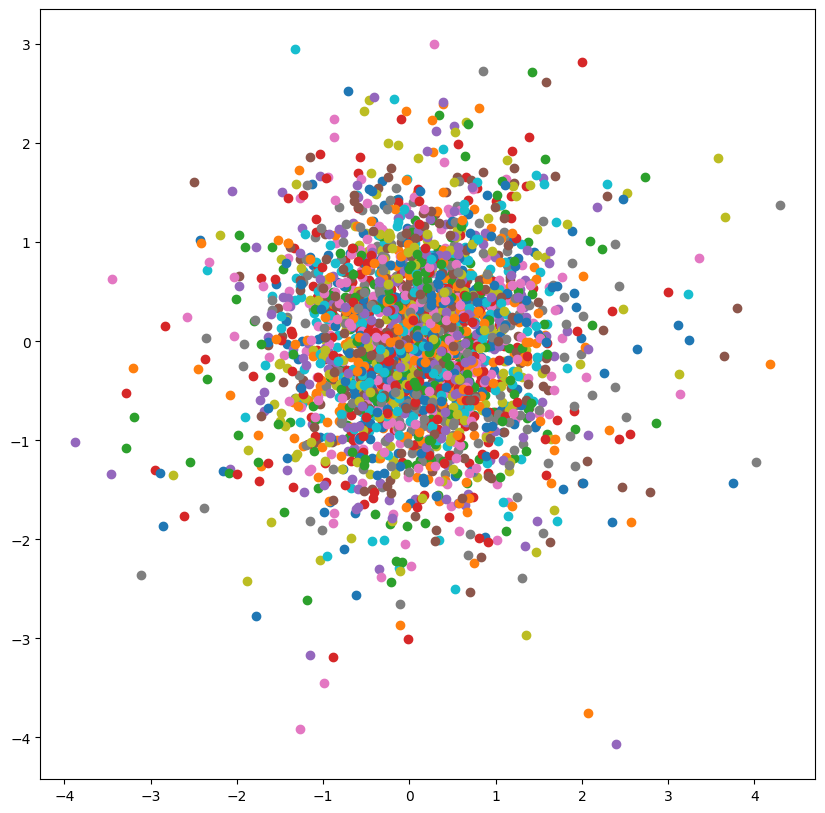

In [40]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))

# Iterate over both words and vectors
for vec, word in zip(word_vectors, words):
    plt.scatter(vec[0], vec[1])
    # Optionally, uncomment the next line to display the text labels
    # plt.text(vec[0]+0.00, vec[1]+0.00, word, fontsize=9)

# Set the limits to zoom in
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)

plt.show()


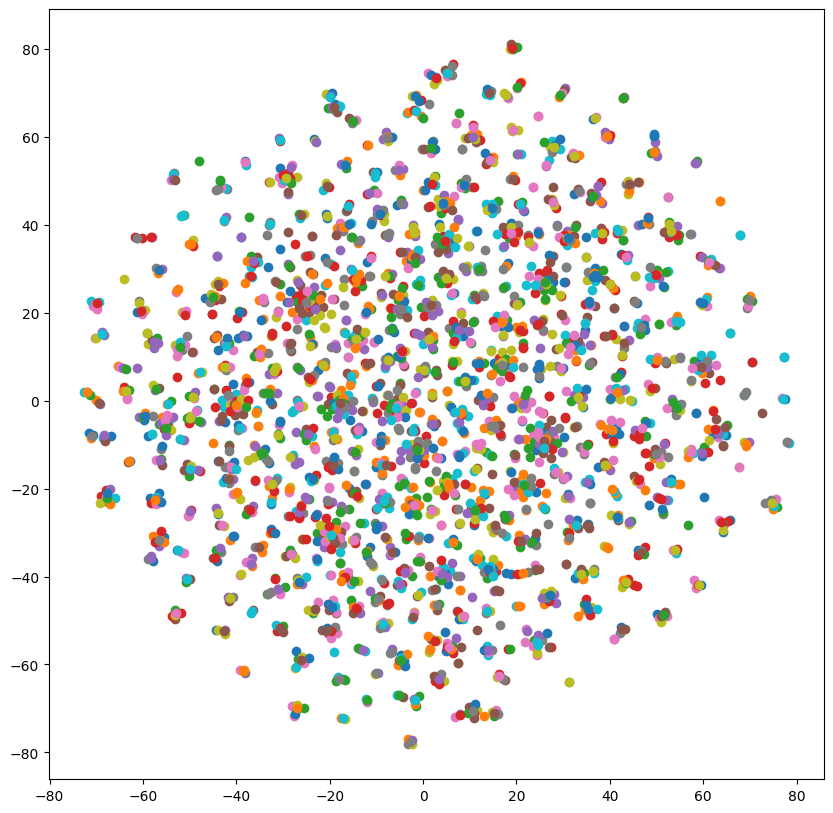

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming 'word_vectors' is your list or array of vectors
# and 'words' is the list of words corresponding to each vector
word_vectors_matrix = np.array(word_vectors)

# Initialize and fit t-SNE, you can adjust parameters like perplexity as needed
tsne = TSNE(n_components=2, perplexity=3, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors_matrix)

# Plotting
plt.figure(figsize=(10, 10))

# Iterate over both words and vectors
for vec, word in zip(word_vectors_2d, words):
    plt.scatter(vec[0], vec[1])
    # plt.text(vec[0]+0.00, vec[1]+0.02, word, fontsize=9)  # Adjust text position if necessary

# Optional: set limits if you want to zoom in, can be helpful if points overlap too much
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)

plt.show()
